# Prediction of house price using boston dataset
We will use Boston dataset present in sklearn library.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import pickle

## Data Preprocessing

### Loading dataset

In [2]:
boston_data = load_boston()      # returns dict object

print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
features = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
target = pd.DataFrame(boston_data.target, columns = ['Price'])
target.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
# concating features and target in one dataframe
df = pd.concat([features, target], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Checking Missing Values

In [7]:
df.isnull().sum()    # isnull and isna is same

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

This tells us that there are no null values present. Now I will check descriptive statistics of features and target.

In [8]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


25% percentile of target value is 17.02 this means that 25% of the prices are less than 17.02.
Mean of the target value is 22.53.

Let'see how data is distributed for every column.

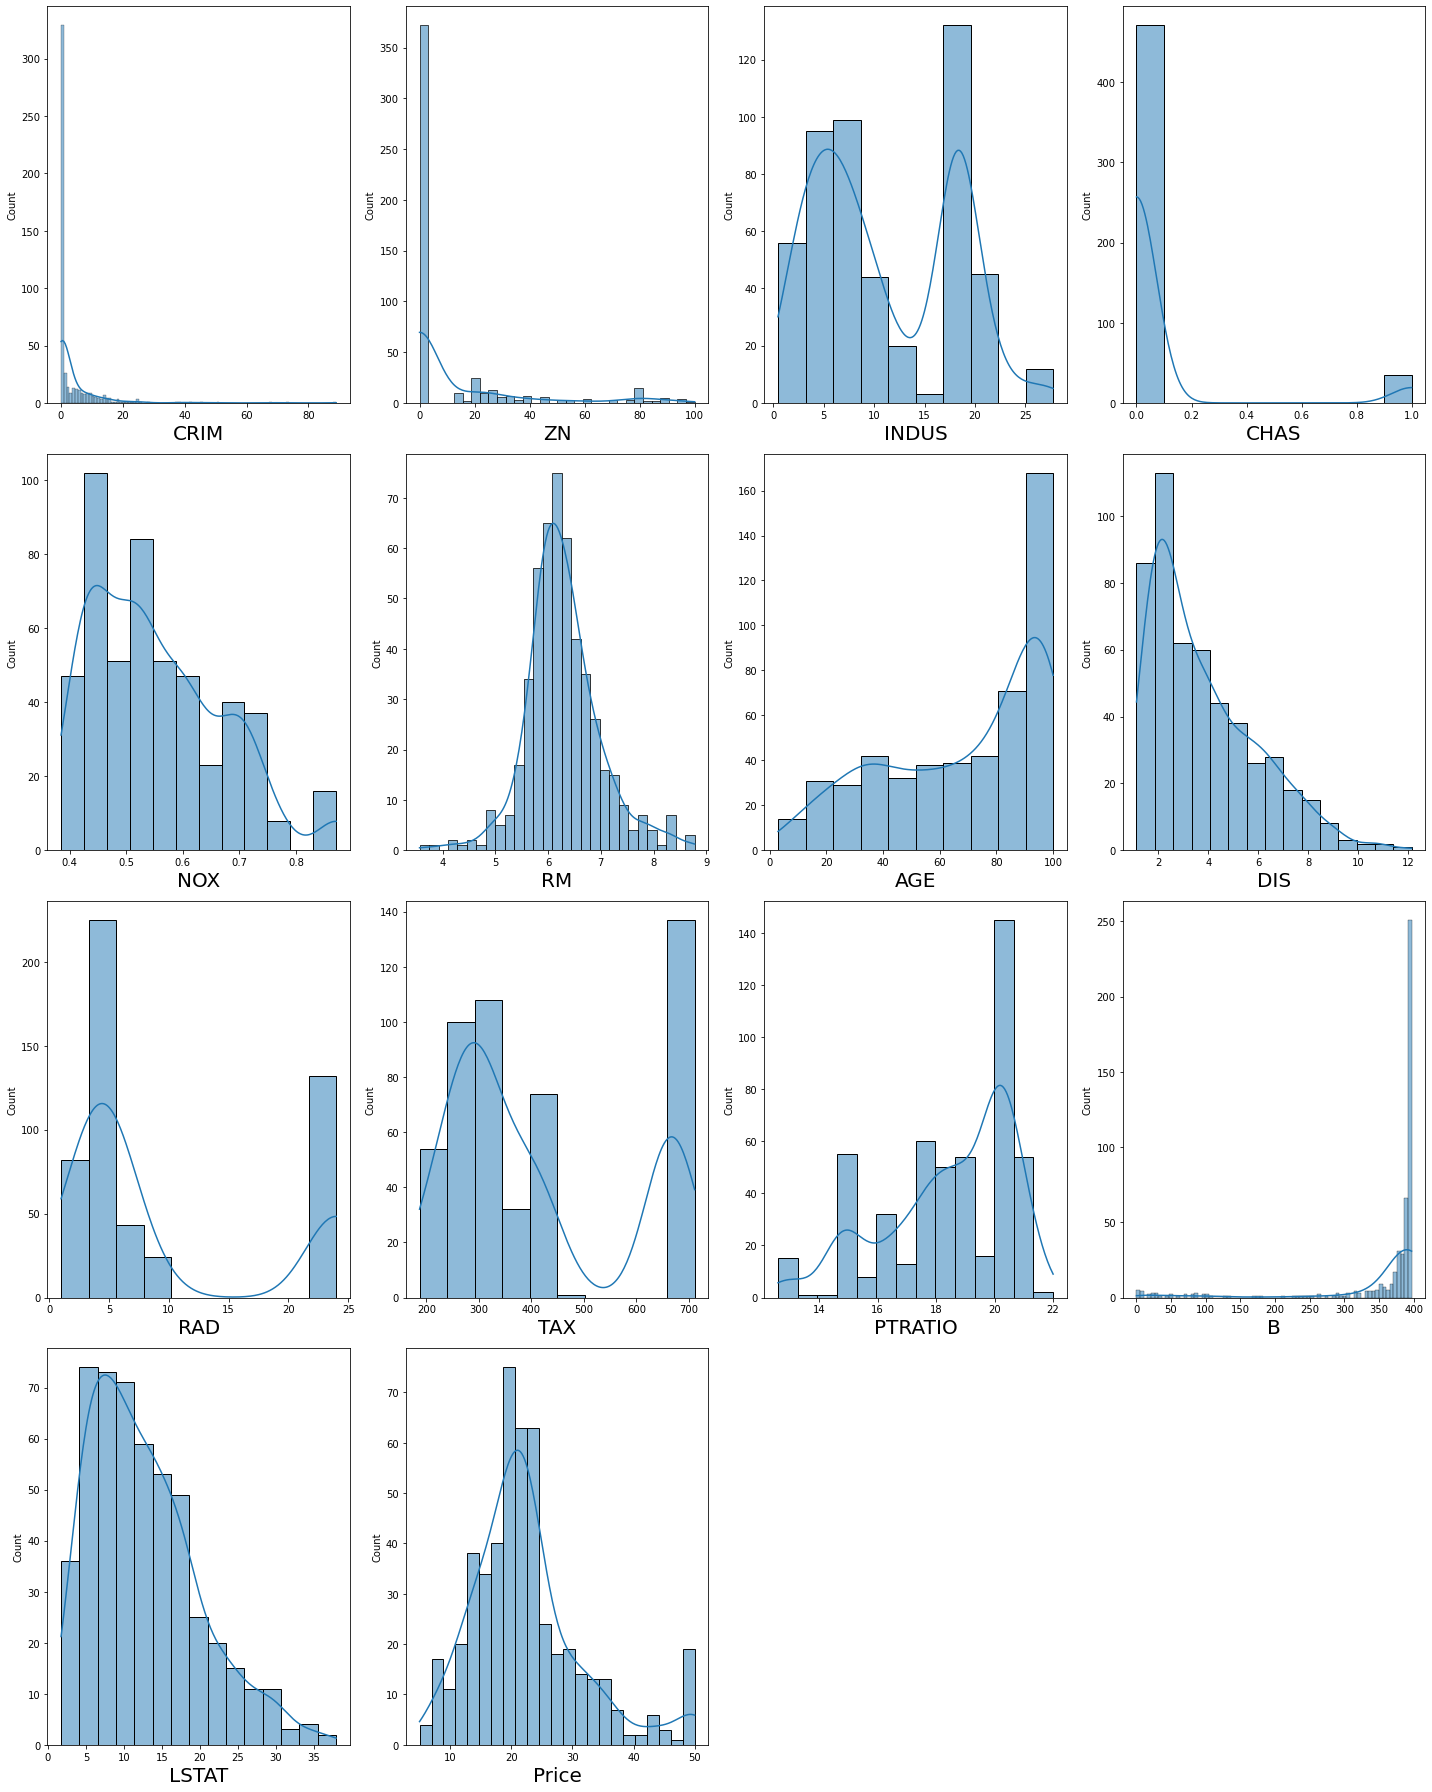

In [9]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Price, RM variables are distributed normally.

### Outlier Detection
Let's plot boxplot to know presence of outliers.

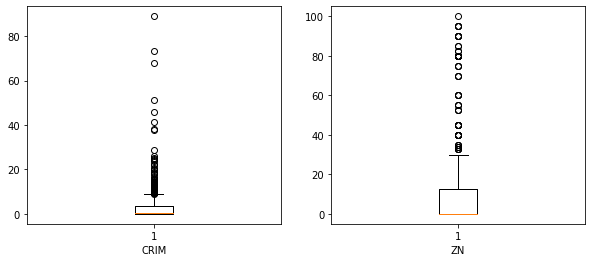

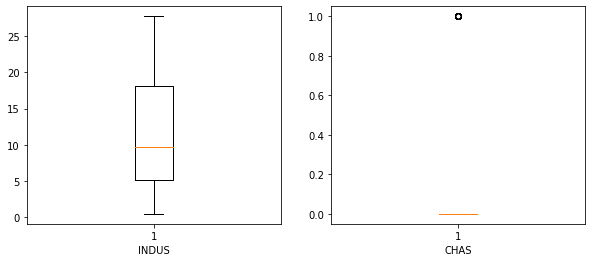

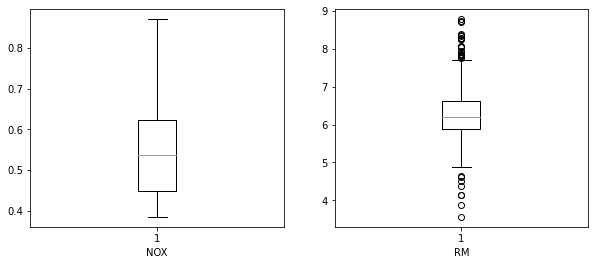

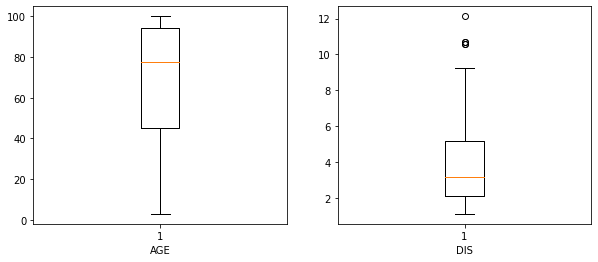

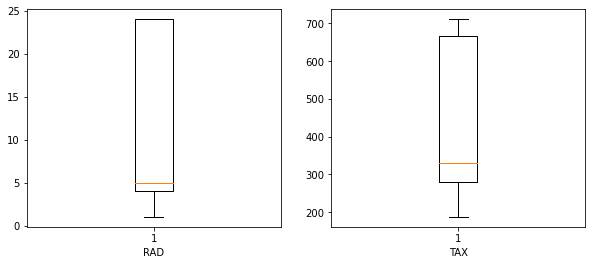

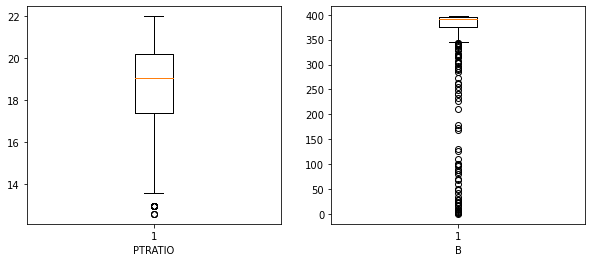

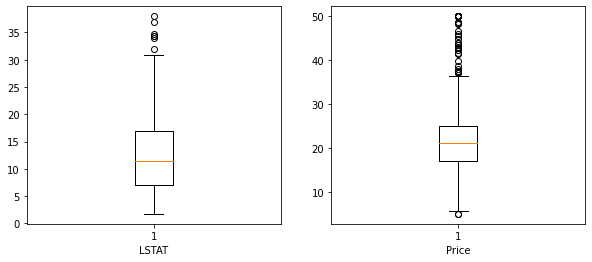

In [10]:
col = list(df.columns)
for i in range(0, len(col), 2):
    plt.figure(figsize = (10,4))
    plt.subplot(121)
    plt.boxplot(df[col[i]])
    plt.xlabel(col[i])
    if i != len(col)-1:
        plt.subplot(122)
        plt.boxplot(df[col[i+1]])
        plt.xlabel(col[i+1])

From boxplot we observe that there are outliers present. Let's detect outliers using IQR Method.

In [11]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


We can ignore outliers but it is better to treat them. Here I will treat them using winsorize method. I tried different different fractions to fill outliers and found minimum required percentile value in order to replace all outliers.

In [12]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        dataframe[col] = winsorize(dataframe[col], limits=[0.18, 0.14],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,0
1,ZN,0
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


We have successfully treated outliers. Now there are no outliers present. Let's move ahead

### Feature Selection

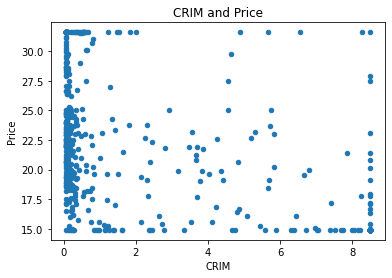

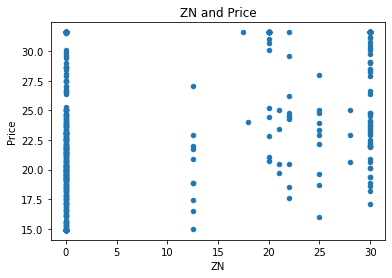

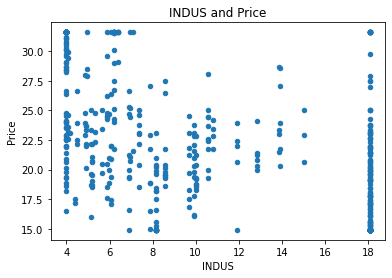

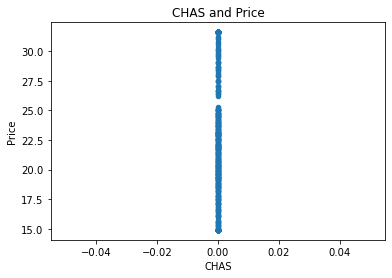

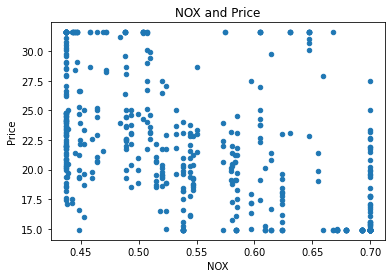

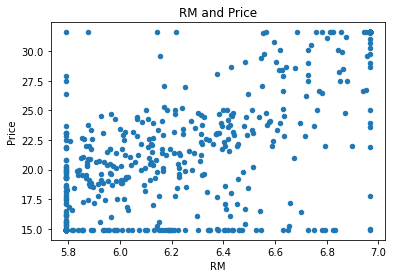

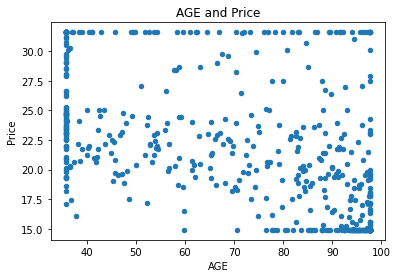

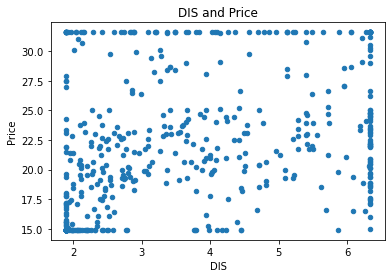

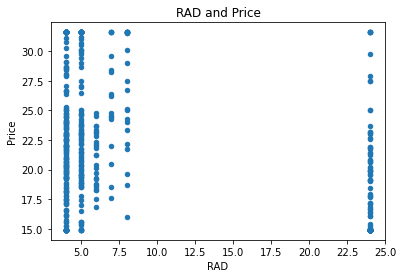

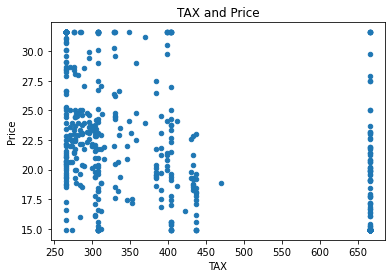

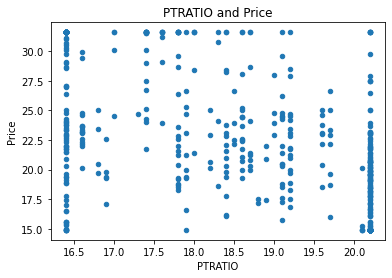

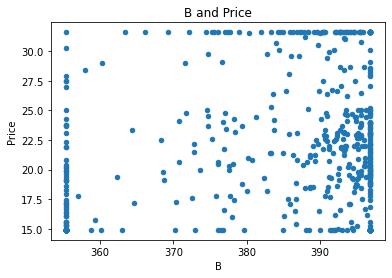

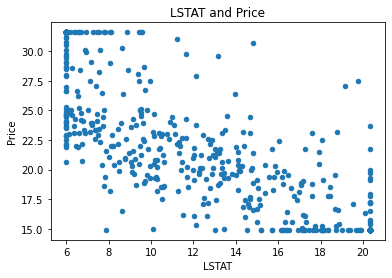

In [13]:
for col in list(features.columns):
    df.plot.scatter(x = col, y = "Price", title = "{} and Price".format(col))

From scatter plots we can observe that their is negative linear relationship between LSTM and Positive linear relationship between RM though that doesn't seem to be very linear.. Next I am checking actual linearity and plotting bar graph.

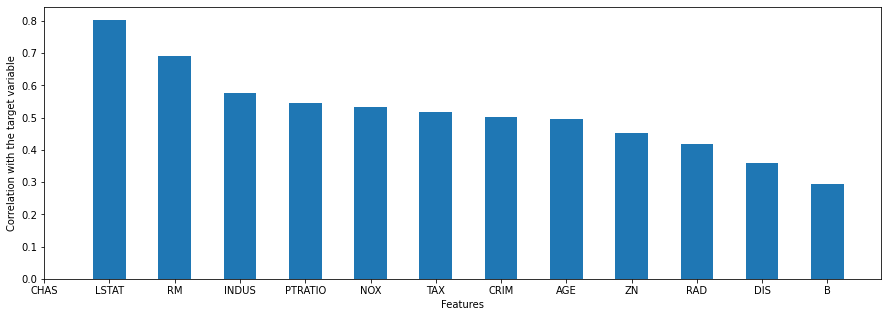

In [14]:
# we are using pearson's correlation
corr = df.corr('pearson')

# take absolute values of correlation
corrs = [abs(corr[attr]['Price']) for attr in list(features)]

# Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

# sort the list of pairs in descending order of correlation
l.sort(key = lambda x : x[0], reverse = True)

# "unzip" pairs to two lists
corrs, labels = list(zip((*l)))

# plot correlations with respect to target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize = (15, 5))
plt.bar(index, corrs, width = 0.5)
plt.xlabel('Features')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()


It is clear that LSTAT and RM are highly correlated with price(target variable). We will use this features for model building.

## Model Building
I will start with model building and perform different different regressions and will pick one which generalizes our data best. Also before using independent variables I will normalize them using MinMaxScaler.

### Linear Regression without cross validation
Since LSTAT is highly correlated with price(target), I will choose this feauter as independet variable for my linear regression.

In [18]:
x_l = df['LSTAT'].values
y_l = df['Price'].values

In [19]:
x_scaler = MinMaxScaler()
x_l = x_scaler.fit_transform(x_l.reshape(-1, 1))   # Reshape(-1,1) to convert one dim to two dim
                                                    #minmaxscaler accepts 2d argument
y_scaler = MinMaxScaler()
y_l = y_scaler.fit_transform(y_l.reshape(-1, 1))


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x_l, y_l, test_size = 0.2,random_state = 42)

In [21]:
lm_l = LinearRegression(fit_intercept=True)
lm_l.fit(xtrain, ytrain)

LinearRegression()

In [22]:
y_pred_train = lm_l.predict(xtrain)

In [24]:
error = np.sqrt(mean_squared_error(ytrain, y_pred_train))
error

0.20845295929280716

In [25]:
# adj r2 for univariate regression
def adj_r2(x,y):
    r2 = r2_score(x,y)
    n = x.size
    p = 1
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [26]:
r2_train = r2_score(ytrain, y_pred_train)
r2_train

0.6365322482881803

In [27]:
adj_r2_train = adj_r2(ytrain, y_pred_train)
adj_r2_train

0.6356280996520813

### Predictions

In [28]:
ypred_test = lm_l.predict(xtest)

In [29]:
r2_test = r2_score(ytest, ypred_test)
r2_test

0.6727143858266875

In [30]:
adj_r2_test = adj_r2(ytest, ypred_test)
adj_r2_test

0.6694415296849543

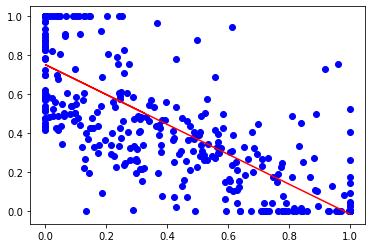

In [31]:
plt.scatter(xtrain, ytrain, color = 'b')
plt.plot(xtrain, y_pred_train, color = 'r')

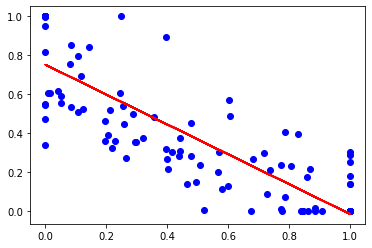

In [32]:
plt.scatter(xtest, ytest, color = 'b')
plt.plot(xtest, ypred_test, color = 'r')

We can see that this model is not enought good to use for future predictions. Let's use cross validation method in order to find best fitting model.

### Linear regression with cross validation
I am defining functions for different different tasks, as I am going to use it continuously in order to try multiple models.

In [33]:
# Scaling function for univariate
# Pass required scaling object e.g. StandardScaler or MinMaxScaler
def scaling(xscaler, yscaler, x, y):
    x = xscaler.fit_transform(x.reshape(-1, 1))
    y = yscaler.fit_transform(y.reshape(-1, 1))
    return x, y

In [34]:
# Function to find best fitt model using cross validation method

def best_fit_finding(model, x, y, scaling_func, xscaler, yscaler):
    x, y = scaling_func(xscaler, yscaler, x, y)
    global result
    result = cross_validate(model, x, y, cv = 5, scoring = 'r2', return_train_score=True, return_estimator=True)
    max_test_index = list(result['test_score']).index(max(result['test_score']))
    best_fit = result['estimator'][max_test_index]
    r2_train = result['train_score'][max_test_index]
    r2_test = result['test_score'][max_test_index]
    return best_fit, r2_train, r2_test, x, y

In [35]:
# To evaluate model on whole dataset and return predicted values, r2, adj_r2
def model_evaluation(model, x, y):
    ypred = model.predict(x.reshape(-1,1))
    r2 = r2_score(y, ypred)
    n = x.shape[0]
    try:
        p = x.shape[1]
    except IndexError:
        p = 1
    finally:
        adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return ypred, r2, adj_r2

In [36]:
xl = df['LSTAT'].values
yl = df['Price'].values

In [37]:
xscalerl = MinMaxScaler()
yscalerl = MinMaxScaler()

In [38]:
lm = LinearRegression()
best_fit, r2_train, r2_test, xl, yl = best_fit_finding(lm, xl, yl, scaling, xscalerl, yscalerl)

In [39]:
r2_train

0.6177337253526044

In [42]:
r2_test

0.7151483027884645

#### Model Evaluation

In [43]:
ypred, r2, adj_r2 = model_evaluation(best_fit, xl, yl)

In [44]:
r2, adj_r2

(0.6412695676720513, 0.6405578009412419)

In [45]:
error = np.sqrt(mean_squared_error(ypred, yl))
error

0.20385682964575202

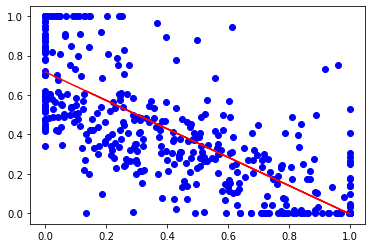

In [46]:
plt.scatter(xl, yl, color = 'b')
plt.plot(xl, ypred, color = 'r')

This model performed better as compared to previous one. But I need more accuracy.

### Multivariate polynomial regression
Let's try to make more complicated model so that it can fit our non-linear data. So for next model, I am going with multivariate polynomial regression with features LSTAT and RM since they high correlation with target variable.

Previous function won't help here, because I am using multiple features so some changes are required.

In [54]:
# Scaling function for multivariate
# Pass required scaling object e.g. StandardScaler or MinMaxScaler
# here no need of reshape for x since x is 2d
def scaling(xscaler, yscaler, x, y):
    x = xscaler.fit_transform(x)
    y = yscaler.fit_transform(y.reshape(-1,1))
    return x, y

In [55]:
# Function to find best fit model using cross validation method
# there are some changes for multivariate

def best_fit_multivariate(model, x, y, scaling_func, xscaler, yscaler):
    #p = x.shape[1]
    #n = x.shape[0]
    x, y = scaling_func(xscaler, yscaler, x, y)
    #x = x.reshape(n, p)
    global result
    result = cross_validate(model, x, y, cv = 5, scoring = 'r2', return_train_score=True, return_estimator=True)
    max_test_index = list(result['test_score']).index(max(result['test_score']))
    best_fit = result['estimator'][max_test_index]
    r2_train = result['train_score'][max_test_index]
    r2_test = result['test_score'][max_test_index]
    return best_fit, r2_train, r2_test, x, y

In [56]:
# To evaluate model on whole dataset and return predicted values, r2, adj_r2
# there are some changes in this function for multivariate
def model_evaluation_multivariate(model, x, y):
    ypred = model.predict(x)
    r2 = r2_score(y, ypred)
    n = x.shape[0]
    try:
        p = x.shape[1]
    except IndexError:
        p = 1
    finally:
        adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return ypred, r2, adj_r2

Before I select Independen variables, I will check whether there is multicollinearity using heat maps.

Text(0.5, 1.0, 'Pearson pair-wise Correlation Matrix')

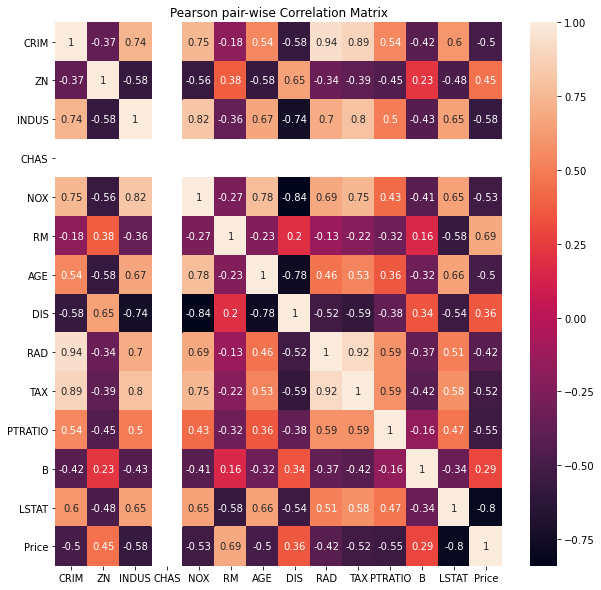

In [57]:
# heat maps
plt.figure(figsize=(10,10))
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr(method='pearson').round(2)
 
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Pearson pair-wise Correlation Matrix')

From heat map we observe that there is no collinearity between RM and LSTAT. Hence I am selecting this two variables as independent variables for Multivariate regression.

In [58]:
xp = df[['LSTAT', 'RM']].values
yp = df['Price'].values

In [59]:
train_acc, test_acc, deg, train_e, test_e = [], [], [], [], []
for d in  range(2, 10):
    poly_features = PolynomialFeatures(degree=d)
   
    # transform the features to higher degree features.
    X_poly = poly_features.fit_transform(xp)
   
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()

    xscalerp = MinMaxScaler()
    yscalerp = MinMaxScaler()

    best_fit_poly, r2_train, r2_test, X_poly, yp = best_fit_multivariate(poly_model, X_poly, yp, scaling, xscalerp, yscalerp)
    
    train_acc.append(r2_train)
    test_acc.append(r2_test)
    deg.append(d)
    

Text(0, 0.5, 'Accuracy')

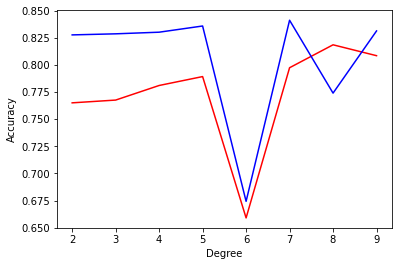

In [61]:
plt.plot(deg, train_acc, color = 'r', label="train")
plt.plot(deg, test_acc, color = 'b', label="test")
plt.xlabel("Degree")
plt.ylabel("Accuracy")

We can observe that accuracy is increasing in very less amount for both training and testing upto deg = 5. This means that when deg is grater than 5, our model is not performing well for sometime. But suddenly after 6 it increased again. So I am choosing deg of my polynomial to be 7.

In [67]:
xp = df[['LSTAT', 'RM']].values
yp = df['Price'].values

In [68]:
poly_features = PolynomialFeatures(degree=7)
   
# transform the features to higher degree features.
X_poly = poly_features.fit_transform(xp)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

xscalerp = MinMaxScaler()
yscalerp = MinMaxScaler()

best_fit_poly, r2_train, r2_test, X_poly, yp = best_fit_multivariate(poly_model, X_poly, yp, scaling, xscalerp, yscalerp)

In [69]:
r2_train, r2_test

(0.7976538840246007, 0.8415073246719529)

#### Model Evaluation

In [70]:
ypred, r2, adj_r2 = model_evaluation_multivariate(best_fit_poly, X_poly, yp)

In [71]:
r2, adj_r2

(0.808408986688272, 0.7937026402506979)

C:\Users\Admin\anaconda3\envs\boston\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


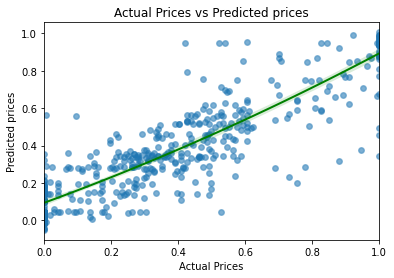

In [72]:
plt.scatter(yp, ypred, alpha=0.4)
sns.regplot(yp, ypred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
 
plt.show()

### Multiple linear regression with cross validation

In [73]:
xm = df[['LSTAT', 'RM']].values
ym = df['Price'].values

In [74]:
xscalerm = MinMaxScaler()
yscalerm = MinMaxScaler()
best_fit_multi, r2_train, r2_test, xm, ym = best_fit_multivariate(poly_model, xm, ym, scaling, xscalerm, yscalerm)
r2_train, r2_test

(0.7017895997032336, 0.7798162039106108)

In [75]:
ypred, r2, adj_r2 = model_evaluation_multivariate(best_fit_multi, xm, ym)
r2, adj_r2

(0.7205990709328021, 0.7194881328450597)

C:\Users\Admin\anaconda3\envs\boston\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


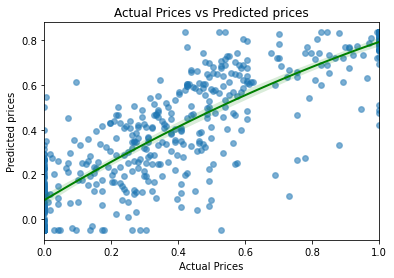

In [76]:
plt.scatter(ym, ypred, alpha=0.4)
sns.regplot(ym, ypred, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")
 
plt.show()

## Final Conclusion:

After looking at all error values from above models, Best fitting model for our dataset is multivariate polynomial regression model. So, let's save our polynomial regression model using pickle. Also I will save MinMaxScaler object for future use with prediction model.

### Saving Model and Data Scaler

In [78]:
pickle.dump(best_fit_poly, open('Boston_Prediction.pkl', 'wb'))
pickle.dump(xscalerp, open('x_scaler.pkl', 'wb'))
pickle.dump(yscalerp, open('y_Scaler.pkl', 'wb'))
pickle.dump(poly_features, open('PolynomialFeatures.pkl', 'wb'))

##### Note :
I tried StandardScaler() also, but results were nearly same.